In [21]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from warnings import filterwarnings

# Grid search results (Sensitivity analysis)

In [22]:
### load
PCAed_gridsearch = pd.read_csv('./GridSearch_results_PCAed.csv')
Raw_gridsearch = pd.read_csv('./GridSearch_results_raw_data.csv')


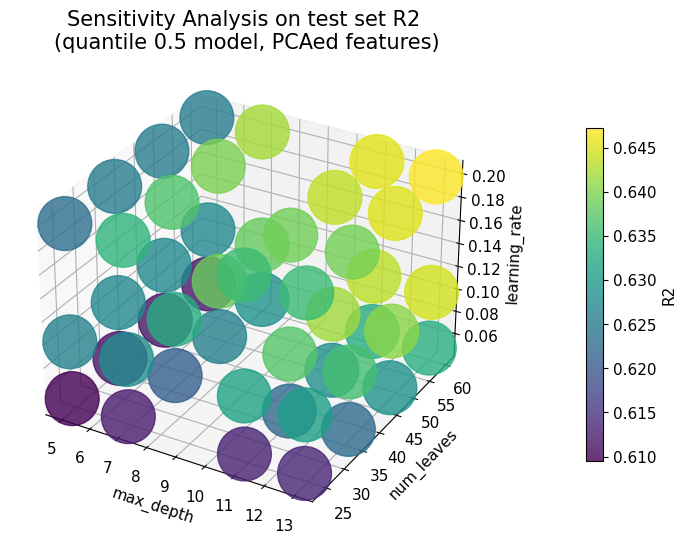

In [23]:

# 1) PCAed_gridsearch
a = PCAed_gridsearch[PCAed_gridsearch['quantile']==0.5]
data = np.array(a.mean_test_neg_mean_squared_error)
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(projection='3d')
plt.title('Sensitivity Analysis on test set R2 \n(quantile 0.5 model, PCAed features)',fontsize=15,loc='center')
p = ax.scatter(
           a.param_model__max_depth,
           a.param_model__num_leaves,
           a.param_model__learning_rate, 
           c=a.mean_test_r2,s=1500,
           alpha=0.8,
           
           )


ax.set(
    xlabel='max_depth',
    ylabel='num_leaves',
    zlabel='learning_rate',
    # zticks=[0, -150, -300, -450],
)
cb = fig.colorbar(p,shrink=0.5,anchor=(1.0,0.5))
cb.set_label('R2')
plt.tight_layout()
# plt.show()
plt.savefig('Sensitivity_analysis_PCAed_model.png',dpi=500)


<Figure size 640x480 with 0 Axes>

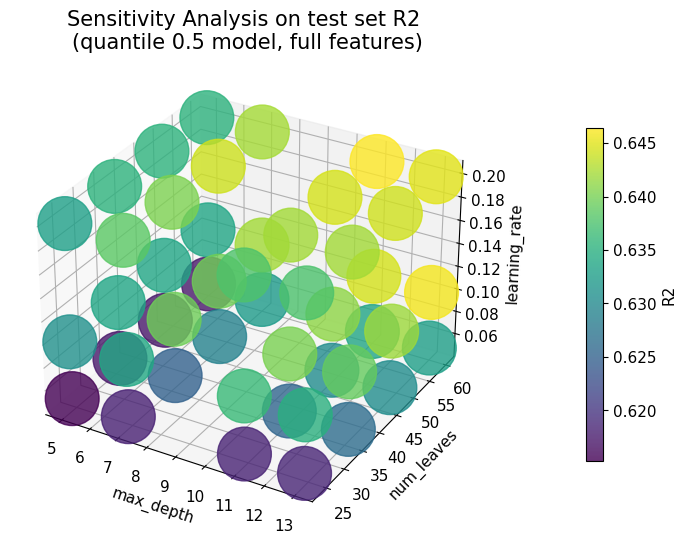

In [24]:

# 1) Raw_gridsearch
a = Raw_gridsearch[Raw_gridsearch['quantile']==0.5]
data = np.array(a.mean_test_neg_mean_squared_error)
fig = plt.figure()

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
plt.title('Sensitivity Analysis on test set R2 \n(quantile 0.5 model, full features)',fontsize=15,loc='center')
p = ax.scatter(
           a.param_model__max_depth,
           a.param_model__num_leaves,
           a.param_model__learning_rate, 
           c=a.mean_test_r2,s=1500,
           alpha=0.8,
           
           )


ax.set(
    xlabel='max_depth',
    ylabel='num_leaves',
    zlabel='learning_rate',
    # zticks=[0, -150, -300, -450],
)
cb = fig.colorbar(p,shrink=0.5,anchor=(1.0,0.5))
cb.set_label('R2')
plt.tight_layout()
# plt.show()
plt.savefig('Sensitivity_analysis_full_features_model.png',dpi=500)


# Learning rate

In [12]:
from Generating_Feature_Importance_tuning_PCA_model import PCA_My_Airbnb_Capstone_Model, PCA_pre_processing_pipeline
from Generating_Feature_Importance_tuning_raw_feature_model import My_Airbnb_Capstone_Model, pre_processing_pipeline
from scipy.stats import spearmanr
def spearmanr_score(truth, pred):
        return spearmanr(truth, pred)[0]
model1 = pickle.load(open('./Feature_Importance_tuning_raw_feature_model.pkl','rb'))
model2 = pickle.load(open('./Feature_Importance_tuning_PCA_model.pkl','rb'))


In [14]:
train_size_abs1, train_scores1, test_scores1 = model1.learning_curve_dict[0.5]
train_size_abs2, train_scores2, test_scores2 = model2.learning_curve_dict[0.5]

In [8]:
%matplotlib inline


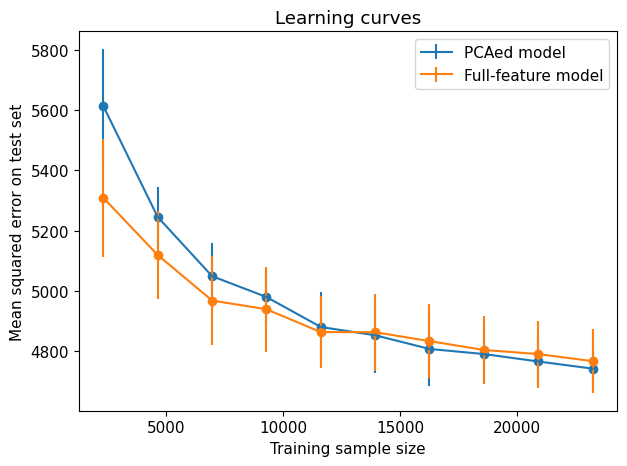

In [25]:
import matplotlib.pyplot as plt
plt.scatter(
    train_size_abs1,
    -np.mean(test_scores1, axis=1)
)
plt.errorbar(train_size_abs1,
             -np.mean(test_scores1, axis=1), 
             yerr=np.std(test_scores1, axis=1), 
             label='PCAed model')

plt.scatter(
    train_size_abs2,
    -np.mean(test_scores2, axis=1)
)
plt.errorbar(train_size_abs2,
             -np.mean(test_scores2, axis=1), 
             yerr=np.std(test_scores2, axis=1), 
             label='Full-feature model')

plt.title('Learning curves')
plt.legend()
plt.xlabel('Training sample size')
plt.ylabel('Mean squared error on test set')
plt.tight_layout()
plt.savefig('Learning_curve_analysis.png',dpi=500)
plt.show()

In [7]:
-np.mean(test_scores, axis=1)

array([     5613.2,      5245.5,      5049.3,      4980.2,      4880.7,      4853.4,      4807.9,      4791.1,      4766.4,      4742.7])

In [122]:
train_scores

array([[    -3766.4,     -3509.5,     -4104.4],
       [    -3968.1,     -3716.6,     -4190.4],
       [    -4113.1,     -3955.2,     -4158.1],
       [    -4026.6,     -3998.8,     -4262.4],
       [    -4019.2,     -4122.8,     -4323.8],
       [    -4112.3,     -4104.9,     -4364.7],
       [    -4105.7,       -4201,       -4375],
       [    -4193.3,     -4315.8,     -4327.3],
       [    -4222.7,     -4352.4,     -4297.7],
       [    -4257.7,     -4359.9,     -4247.1]])

In [ ]:
a.param_model__learning_rate, 
           a.param_model__max_depth,
           a.param_model__num_leaves,c=a.mean_test_r2

In [32]:
X, Y, Z = np.meshgrid(
    a.param_model__learning_rate.unique(),
    a.param_model__max_depth.unique(),
    a.param_model__num_leaves.unique()
)

In [46]:
data = []
for a1,a2,a3 in zip(X.flatten(),Y.flatten(),Z.flatten()):
    v = a[(a.param_model__learning_rate==a1) & (a.param_model__max_depth==a2) & (a.param_model__num_leaves==a3)]['mean_test_r2'].values[0]
    data.append(v)
data=np.array(data).reshape(X.shape)
    
    

In [51]:
Z

array([[[60, 48, 36, 24],
        [60, 48, 36, 24],
        [60, 48, 36, 24]],

       [[60, 48, 36, 24],
        [60, 48, 36, 24],
        [60, 48, 36, 24]],

       [[60, 48, 36, 24],
        [60, 48, 36, 24],
        [60, 48, 36, 24]],

       [[60, 48, 36, 24],
        [60, 48, 36, 24],
        [60, 48, 36, 24]]])

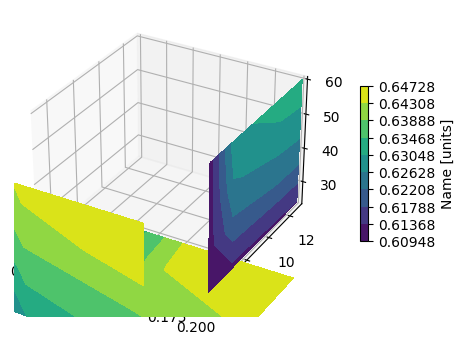

In [55]:
kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# # Plot edges
# edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
# ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
# ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
# ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# # Set labels and zticks
# ax.set(
#     xlabel='X [km]',
#     ylabel='Y [km]',
#     zlabel='Z [m]',
#     zticks=[0, -150, -300, -450],
# )

# Set zoom and angle view
# ax.view_init(40, -30, 0)
# ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

# Show Figure
plt.show()

In [9]:
PCAed_gridsearch[PCAed_gridsearch['quantile']==0.5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__num_leaves,params,split0_test_r2,split1_test_r2,...,mean_test_spearmanr,std_test_spearmanr,rank_test_spearmanr,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,quantile
96,69.816215,1.363167,21.263237,3.886100,0.20,13,60,"{'model__learning_rate': 0.2, 'model__max_dept...",0.640470,0.661469,...,0.852103,0.004837,6,-4709.972893,-4468.250972,-4664.462724,-4614.228863,104.880734,1,0.5
97,72.921724,1.023683,30.302929,0.366587,0.20,11,60,"{'model__learning_rate': 0.2, 'model__max_dept...",0.639830,0.660837,...,0.852485,0.005366,5,-4718.363846,-4476.600603,-4712.223601,-4635.729350,112.548935,2,0.5
98,67.349511,0.625572,27.452202,1.238640,0.20,13,48,"{'model__learning_rate': 0.2, 'model__max_dept...",0.637975,0.661241,...,0.852068,0.005478,7,-4742.656372,-4471.261089,-4704.159193,-4639.358885,119.897623,3,0.5
99,74.887844,0.336830,28.589676,1.362998,0.10,13,60,"{'model__learning_rate': 0.1, 'model__max_dept...",0.637639,0.658337,...,0.854097,0.005201,1,-4747.064091,-4509.600367,-4687.922860,-4648.195773,100.932110,4,0.5
100,66.542096,1.330833,26.581364,0.925598,0.20,11,48,"{'model__learning_rate': 0.2, 'model__max_dept...",0.635948,0.658813,...,0.850803,0.004475,14,-4769.214627,-4503.314930,-4714.742687,-4662.424081,114.683883,5,0.5
101,76.054815,0.154587,28.928633,0.857136,0.10,11,60,"{'model__learning_rate': 0.1, 'model__max_dept...",0.636256,0.658153,...,0.853846,0.005411,2,-4765.176546,-4512.029498,-4712.665189,-4663.290411,109.084855,6,0.5
102,67.940397,0.578115,26.998584,0.582882,0.20,7,60,"{'model__learning_rate': 0.2, 'model__max_dept...",0.634109,0.658439,...,0.851372,0.004588,12,-4793.307903,-4508.255037,-4746.856302,-4682.806414,124.874804,7,0.5
103,73.419394,0.607723,29.312664,1.717906,0.10,11,48,"{'model__learning_rate': 0.1, 'model__max_dept...",0.634881,0.656157,...,0.852898,0.005077,3,-4783.189600,-4538.365101,-4730.806840,-4684.120514,105.259896,8,0.5
104,74.398949,0.572513,28.397007,0.778134,0.10,13,48,"{'model__learning_rate': 0.1, 'model__max_dept...",0.632077,0.655493,...,0.852717,0.004688,4,-4819.931070,-4547.135243,-4732.669158,-4699.911823,113.751697,9,0.5
105,73.421844,0.496749,27.151922,0.806594,0.20,7,48,"{'model__learning_rate': 0.2, 'model__max_dept...",0.633151,0.652541,...,0.850440,0.005303,17,-4805.854907,-4586.091102,-4747.802329,-4713.249446,92.985514,10,0.5


In [5]:
PCAed_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__num_leaves,params,split0_test_r2,split1_test_r2,...,mean_test_spearmanr,std_test_spearmanr,rank_test_spearmanr,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,quantile
0,72.154064,1.395594,28.689289,1.428757,0.20,11,60,"{'model__learning_rate': 0.2, 'model__max_dept...",0.086283,0.072258,...,0.814107,0.007534,1,-11970.024153,-12245.220500,-12217.766581,-12144.337078,123.766383,1,0.05
1,73.367496,2.006221,27.239164,0.790583,0.20,7,60,"{'model__learning_rate': 0.2, 'model__max_dept...",0.074807,0.068740,...,0.812326,0.008520,5,-12120.371076,-12291.659694,-12511.538862,-12307.856544,160.103743,2,0.05
2,71.573995,1.180938,26.544314,1.168408,0.20,11,48,"{'model__learning_rate': 0.2, 'model__max_dept...",0.075364,0.056147,...,0.812774,0.006698,4,-12113.075927,-12457.871229,-12482.714410,-12351.220522,168.698808,3,0.05
3,74.177290,3.178633,21.169775,4.201742,0.20,13,60,"{'model__learning_rate': 0.2, 'model__max_dept...",0.068394,0.054598,...,0.813238,0.007112,2,-12204.388812,-12478.320896,-12390.632406,-12357.780704,114.219445,4,0.05
4,69.876838,1.256362,28.278102,2.173459,0.20,7,48,"{'model__learning_rate': 0.2, 'model__max_dept...",0.073349,0.059275,...,0.811741,0.008552,6,-12139.474720,-12416.582417,-12541.088836,-12365.715324,167.857222,5,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,71.271798,3.402893,27.120891,0.615118,0.05,7,24,"{'model__learning_rate': 0.05, 'model__max_dep...",-0.499392,-0.501241,...,0.782632,0.002937,6,-19642.584550,-19814.817261,-19755.824661,-19737.742157,71.466819,44,0.95
236,70.456038,0.336482,27.910458,0.510537,0.05,5,36,"{'model__learning_rate': 0.05, 'model__max_dep...",-0.517260,-0.523384,...,0.774238,0.005877,45,-19876.664079,-20107.077082,-20305.300023,-20096.347062,175.154300,45,0.95
237,70.059823,0.486301,27.708657,0.945206,0.05,5,48,"{'model__learning_rate': 0.05, 'model__max_dep...",-0.517260,-0.523384,...,0.774238,0.005877,45,-19876.664079,-20107.077082,-20305.300023,-20096.347062,175.154300,45,0.95
238,65.250760,0.580168,27.344966,0.627484,0.05,5,60,"{'model__learning_rate': 0.05, 'model__max_dep...",-0.517260,-0.523384,...,0.774238,0.005877,45,-19876.664079,-20107.077082,-20305.300023,-20096.347062,175.154300,45,0.95
